# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv('TransaksiBank.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
relevants_features = ["TransactionAmount", "TransactionType", "Location", "Channel", "CustomerAge", "AccountBalance"]
numeric_features = ["TransactionAmount", "CustomerAge", "AccountBalance"]
categorical_features = ["TransactionType", "Location", "Channel"]

df_features = df[relevants_features]
df_numeric_features = df[numeric_features]
df_categorical_features = df[categorical_features]

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionAmount  2512 non-null   float64
 1   TransactionType    2512 non-null   object 
 2   Location           2512 non-null   object 
 3   Channel            2512 non-null   object 
 4   CustomerAge        2512 non-null   int64  
 5   AccountBalance     2512 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 117.9+ KB


In [ ]:
df_features.duplicated().sum()
df_features.isna().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
AccountBalance,0


In [ ]:
Q1 = (df_numeric_features).quantile(0.25)
Q3 = (df_numeric_features).quantile(0.75)
IQR = Q3 - Q1

max_value = Q3 + (1.5 * IQR)
min_value = Q1 - (1.5 * IQR)

q1_outlier = df_numeric_features < min_value
q3_outlier = df_numeric_features > max_value

print(q1_outlier.sum())
print(q3_outlier.sum())

TransactionAmount    0
CustomerAge          0
AccountBalance       0
dtype: int64
TransactionAmount    51
CustomerAge           0
AccountBalance        0
dtype: int64


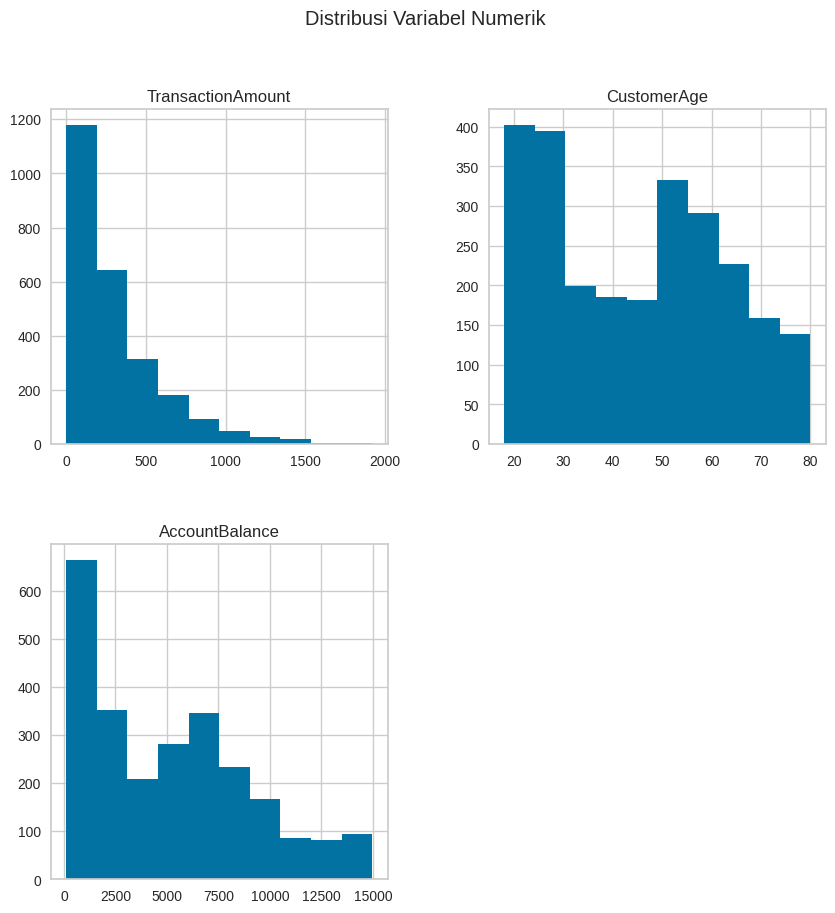

In [ ]:
correlation_numeric_features = df[numeric_features].corr()

df_numeric_features.hist(figsize=(10, 10))
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

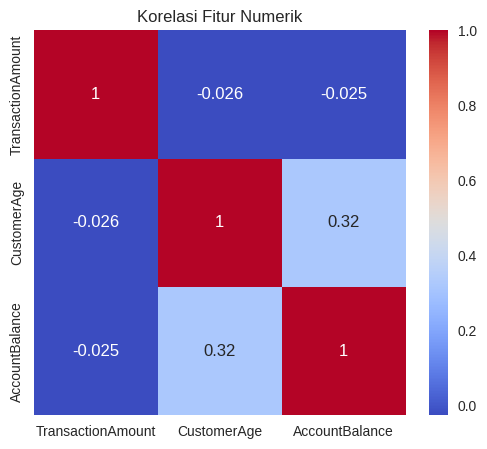

In [ ]:
plt.figure(figsize=(6, 5))
sb.heatmap(correlation_numeric_features, annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

<ipython-input-8-de90329e2483>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
<ipython-input-8-de90329e2483>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
<ipython-input-8-de90329e2483>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")


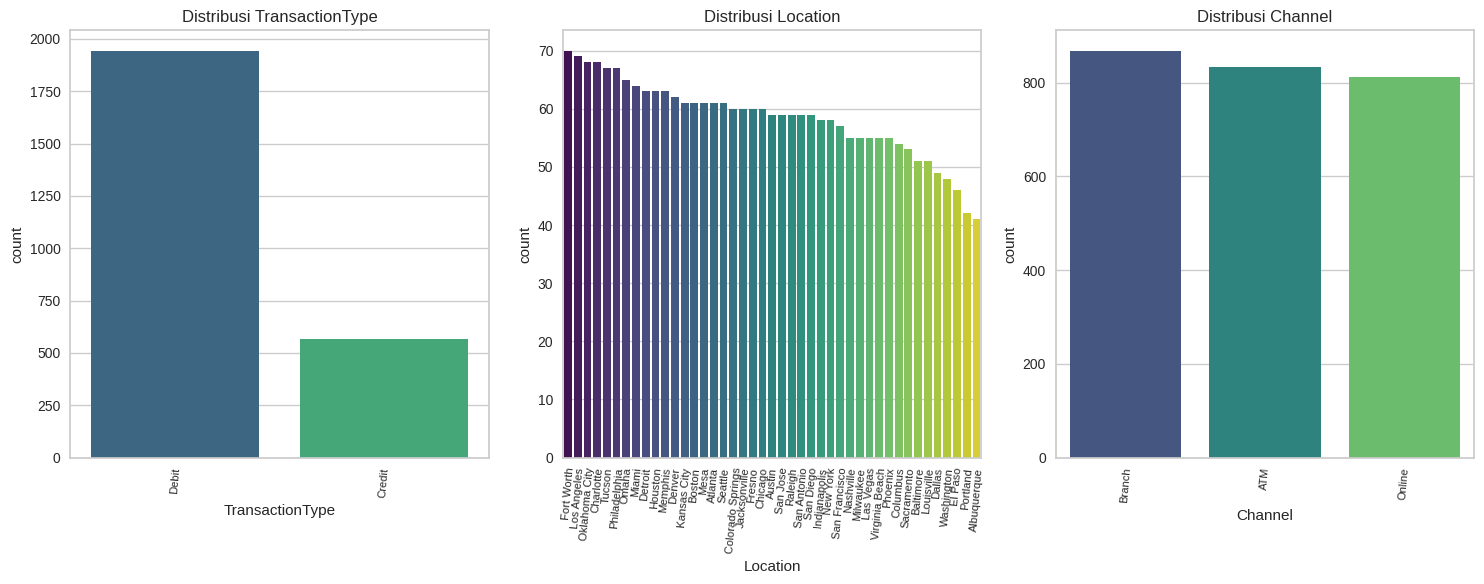

In [ ]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sb.countplot(x=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=85, fontsize=8)

plt.tight_layout()
plt.show()

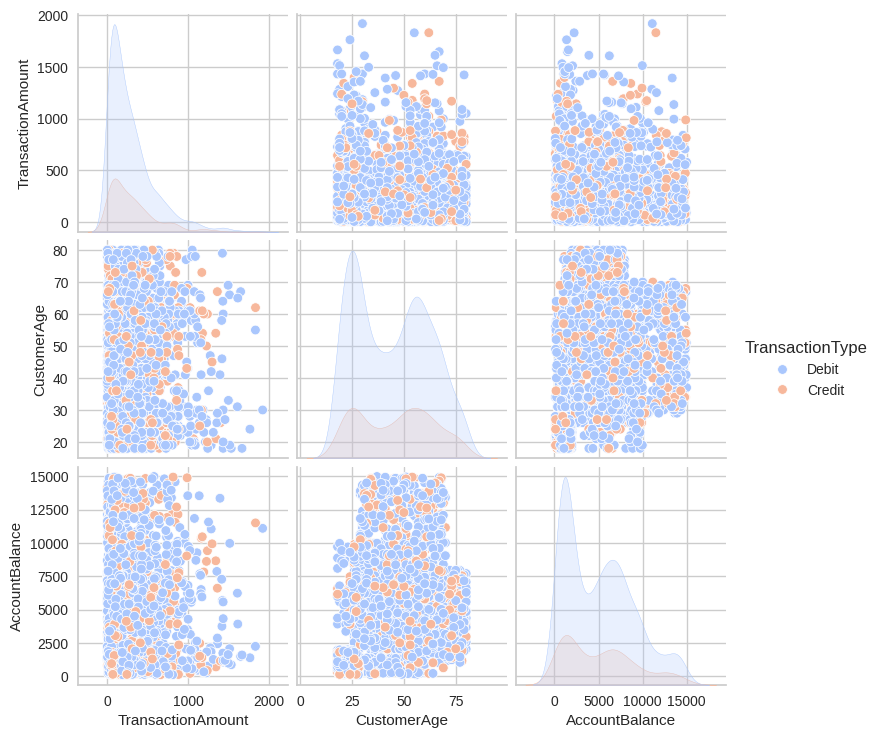

In [ ]:
sb.pairplot(df_features, hue="TransactionType", diag_kind="kde", palette="coolwarm")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(
    df[numeric_features]
)

In [ ]:
df_numeric_features = df_numeric_features[~((df_numeric_features < (min_value)) | (df_numeric_features > (max_value))).any(axis=1)]
print(q1_outlier.sum())
print(q3_outlier.sum())

TransactionAmount    0
CustomerAge          0
AccountBalance       0
dtype: int64
TransactionAmount    51
CustomerAge           0
AccountBalance        0
dtype: int64


In [ ]:
label_encoder = {}

for feature in categorical_features:
    label_encoder = LabelEncoder()
    df_features[feature] = label_encoder.fit_transform(df_features[feature])

<ipython-input-12-e2a8be51162c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[feature] = label_encoder.fit_transform(df_features[feature])
<ipython-input-12-e2a8be51162c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[feature] = label_encoder.fit_transform(df_features[feature])
<ipython-input-12-e2a8be51162c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
df_features.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,AccountBalance
0,14.09,1,36,0,70,5112.21
1,376.24,1,15,0,68,13758.91
2,126.29,1,23,2,19,1122.35
3,184.50,1,33,2,26,8569.06
4,13.45,0,1,2,26,7429.40


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
km_model = KMeans(n_clusters=3)
df_features['KMeans_Cluster'] = km_model.fit_predict(df_features[relevants_features])

<ipython-input-27-77b915ab45c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['KMeans_Cluster'] = km_model.fit_predict(df_features[relevants_features])


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Skor Silhoutette: 0.6025099218755097


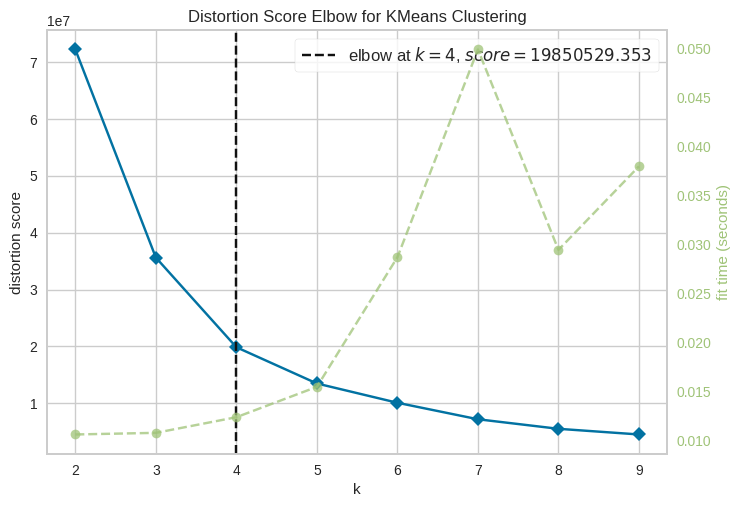

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
skor_silhouette = silhouette_score(df_features, df_features['KMeans_Cluster'])
print(f"Skor Silhoutette: {skor_silhouette}")

visualizer = KElbowVisualizer(km_model, k=(2, 10))
visualizer.fit(df_features)
visualizer.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
mi_scores = mutual_info_classif(df_features[relevants_features], df_features["KMeans_Cluster"])
mi_scores_df = pd.DataFrame({"Feature": relevants_features, "Score": mi_scores})

mi_scores_df = mi_scores_df.sort_values(by="Score", ascending=False)
print(mi_scores_df)

             Feature     Score
5     AccountBalance  1.022349
4        CustomerAge  0.171517
1    TransactionType  0.011117
0  TransactionAmount  0.000000
2           Location  0.000000
3            Channel  0.000000


In [ ]:
selected_features = ["AccountBalance", "CustomerAge"]
df_selected_features = df_features[selected_features]

km_model = KMeans(n_clusters=3, random_state=40)
df_selected_features["KMeans_Cluster"] = km_model.fit_predict(df_features[selected_features])

skor_silhouette = silhouette_score(df_selected_features, df_selected_features['KMeans_Cluster'])
print(f"Skor Silhoutette: {skor_silhouette}")

Skor Silhoutette: 0.7800537379012541


<ipython-input-29-b8e9b09a19ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features["KMeans_Cluster"] = km_model.fit_predict(df_features[selected_features])


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

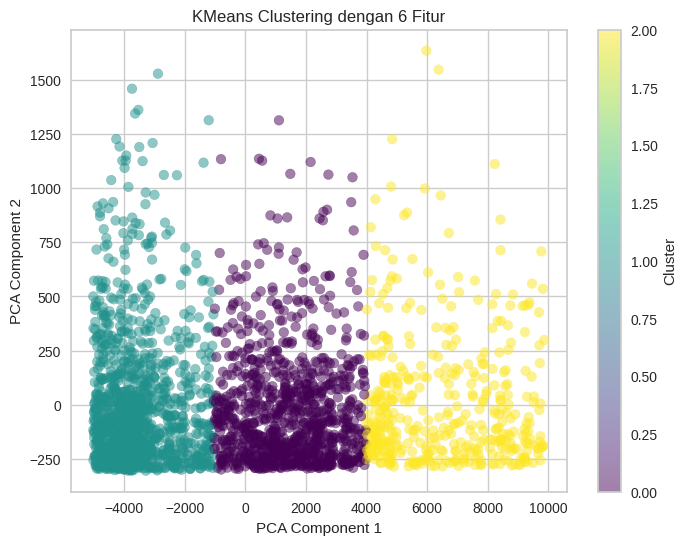

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_features)

plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_features["KMeans_Cluster"], cmap="viridis", alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering dengan 6 Fitur")
plt.colorbar(label="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [ ]:
df_features["Cluster"] = km_model.labels_

<ipython-input-19-acd17c4a5196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["Cluster"] = km_model.labels_


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [ ]:
df_features[selected_features] = scaler.fit_transform(df_features[selected_features])

<ipython-input-22-3a4d57b775c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[selected_features] = scaler.fit_transform(df_features[selected_features])


In [ ]:
df_features[selected_features] = scaler.inverse_transform(df_features[selected_features])

<ipython-input-21-8c0a809e8529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[selected_features] = scaler.inverse_transform(df_features[selected_features])


In [ ]:
df_features.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,AccountBalance,KMeans_Cluster,Cluster
0,14.09,1,36,0,0.838710,0.336832,0,0
1,376.24,1,15,0,0.806452,0.918055,2,2
2,126.29,1,23,2,0.016129,0.068637,1,1
3,184.50,1,33,2,0.129032,0.569198,0,0
4,13.45,0,1,2,0.129032,0.492591,0,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
cluster_conclu = df_features.groupby("Cluster").mean()
cluster_conclu

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,AccountBalance,KMeans_Cluster
Cluster,,,,,,,
0,280.284057,0.778602,20.317797,1.023305,0.542339,0.433594,0.002119
1,308.536389,0.775174,21.443576,0.965278,0.321643,0.099707,0.999132
2,306.570913,0.759615,21.516827,0.990385,0.476504,0.774761,2.000000


Tulis hasil interpretasinya di sini.
1. Cluster 1:
- **TransactionAmount:** 280.28
- **TransactionType:** 0.77
- **Location:** 20.31
- **Channel:** 1
- **CustomerAge:** 0.54
- **AccountBalance:** 0.43
- Analisis: <br>
Pelanggan dalam cluster ini memiliki jumlah transaksi yang lebih rendah dibandingkan cluster lain, dengan akun balance menengah. Channel transaksi cenderung lebih tinggi dibanding cluster lain.
2. Cluster 2:
- **TransactionAmount:** 308.53
- **TransactionType:** 0.775
- **Location:** 21.44
- **Channel:** 0.96
- **CustomerAge:** 0.32
- **AccountBalance:** 0.09
- Analisis: <br>
Pelanggan di cluster ini memiliki jumlah transaksi tertinggi, namun account balance yang paling rendah. Ini bisa mengindikasikan mereka sering melakukan transaksi tetapi memiliki saldo yang lebih kecil dibanding cluster lain.
3. Cluster 3:
- **TransactionAmount:** 306.57
- **TransactionType:** 0.759
- **Location:** 21.51
- **Channel:** 0.99
- **CustomerAge:** 0.47
- **AccountBalance:** 0.77
- Analisis: <br>
Pelanggan dalam cluster ini memiliki transaksi tinggi dengan account balance tertinggi. Ini menunjukkan mereka mungkin merupakan pelanggan dengan tingkat finansial lebih stabil dan cenderung memiliki lebih banyak dana dibandingkan cluster lain.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_features.to_csv('Hasil Clustering.csv')